In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Cargo el archivo CSV 
data = pd.read_csv('data/original_cafe_sales.csv')

#muestro las primeras filas para entender la estructura del dataset
print("\nPrimera filas del dataset:")
data.head()

# Informaci√≥n general de las columnas
print("\nInformaci√≥n del dataset:")
data.info()


# Revisar estad√≠sticas descriptivas
print("\nEstad√≠sticas descriptivas:")
print(data.describe(include="all"))

#Identifico columnas con problemas como valores faltantes (NaN), 
#valores inconsistentes (e.g., "UNKNOWN"), y columnas con datos en el formato incorrecto.


Primera filas del dataset:

Informaci√≥n del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB

Estad√≠sticas descriptivas:
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_1961373  Juice        5            3.0         6.0   
freq                1   1171     20

### INSPECCION DE DATOS: 

**TransactionID:** identificador √∫nico para cada transacci√≥n
**Item:** el producto comprado
**Quantity:** la cantidad comprada
**Price Per Unit:** el precio unitario del producto
**Total Spent:** el total pagado
**Payment Method:** el metodo de pago
**Location:** Lugar donde se efectuo la compra
**Transaction Date:** la fecha de la transaccion

**An√°lisis:**

1. Hay valores UNKNOWN y ERROR en las columnas categ√≥ricas (Payment Method, Item, Location, Total Spent, Transaction Date).

2. Hay valores faltantes (NaN) en las columnas:
    Quantity (441 valores faltantes)
    Price Per Unit (491 valores faltantes)
    Transaction Date (144 valores faltantes)

3. Las columnas Quantity y Price Per Unit deber√≠an ser completamente num√©ricas.
4. La columna Item contiene valores incorrectos como UNKNOWN y ERROR.


In [47]:

# Contar valores faltantes en cada columna
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# Buscar valores 'UNKNOWN' y 'ERROR' en columnas espec√≠ficas
print("\nValores √∫nicos en columnas categ√≥ricas:")
print("Payment Method:", data['Payment Method'].unique())
print("Item:", data['Item'].unique())
print("Location:", data['Location'].unique())
print("Total Spent:", data['Total Spent'].unique())
print("Transaction Date:", data['Transaction Date'].unique())
#Confirmamos qu√© columnas tienen problemas y qu√© tipo de problemas son (faltantes, valores no v√°lidos, etc.).


Valores faltantes por columna:
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

Valores √∫nicos en columnas categ√≥ricas:
Payment Method: ['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]
Item: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']
Location: ['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']
Total Spent: ['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']
Transaction Date: ['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-03-31' '2023-10-06' '2023-10-28' '2023-07-28' '2023-12-31'
 '2023-11-07' 'ERROR' '2023-05-03' '2023-06-01' '2023-03-21' '2023-11-15'
 '2023-06-10' '2023-02-24' '2023-03-25' '2023-01-15' '2023-04-04'
 '2023-03-30' '2023-12-01' '2023-09-18' '2

### LIMPIEZA DE DATOS

### Limpieza de columnas categ√≥ricas
Primero abordemos las columnas categ√≥ricas con valores no v√°lidos (UNKNOWN, ERROR) y decidamos qu√© hacer.
Convertiremos UNKNOWN y ERROR en NaN, y luego evaluaremos si es viable rellenar los datos faltantes o eliminarlos.

In [48]:
# Reemplazo 'UNKNOWN' y 'ERROR' con NaN 
categorical_columns = ["Payment Method", "Item", "Location", "Transaction Date" , "Total Spent"]
data[categorical_columns] = data[categorical_columns].replace(["UNKNOWN", "ERROR"], np.nan)

# Reviso valores √∫nicos nuevamente
print("\nValores √∫nicos despu√©s de reemplazar 'UNKNOWN' y 'ERROR':")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")



Valores √∫nicos despu√©s de reemplazar 'UNKNOWN' y 'ERROR':
Payment Method: ['Credit Card' 'Cash' nan 'Digital Wallet']
Item: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' nan 'Sandwich' 'Juice' 'Tea']
Location: ['Takeaway' 'In-store' nan]
Transaction Date: ['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-03-31' '2023-10-06' '2023-10-28' '2023-07-28' '2023-12-31'
 '2023-11-07' nan '2023-05-03' '2023-06-01' '2023-03-21' '2023-11-15'
 '2023-06-10' '2023-02-24' '2023-03-25' '2023-01-15' '2023-04-04'
 '2023-03-30' '2023-12-01' '2023-09-18' '2023-06-03' '2023-12-13'
 '2023-04-20' '2023-04-10' '2023-03-11' '2023-06-02' '2023-11-06'
 '2023-08-15' '2023-10-09' '2023-05-28' '2023-07-17' '2023-04-29'
 '2023-06-08' '2023-06-29' '2023-04-17' '2023-12-22' '2023-01-10'
 '2023-10-02' '2023-02-23' '2023-03-22' '2023-11-03' '2023-03-02'
 '2023-06-26' '2023-05-02' '2023-09-05' '2023-01-08' '2023-03-15'
 '2023-11-25' '2023-12-05' '2023-03-19' '2023-06-27' '2023-04-19'
 '2023-10-07

### Limpieza de Columnas
Las columnas Quantity y Price Per Unit contienen valores faltantes (NaN) y deben ser completamente num√©ricas. Vamos a convertirlas a n√∫meros usando pd.to_numeric.

Convierto las columnas a valores num√©ricos, reemplazando cualquier error con NaN.


### Eliminar Filas con NaN en Columnas 
eliminar filas donde las columnas tengan valores NaN, primero aplico un filtro para eliminarlas.

In [49]:
data = data.dropna(subset=["Item", "Total Spent", "Transaction Date", "Location"])

# Verificar si a√∫n quedan NaN en estas columnas
print("Valores faltantes despu√©s de eliminar NaN:")
print(data[["Item", "Total Spent", "Transaction Date", "Location"]].isnull().sum())


Valores faltantes despu√©s de eliminar NaN:
Item                0
Total Spent         0
Transaction Date    0
Location            0
dtype: int64


Paso 2: Rellenar Valores Faltantes en Columnas Num√©ricas con el Promedio
Para las columnas Quantity y Price Per Unit, rellenaremos los valores NaN con el promedio de cada columna

In [50]:
# Relleno valores faltantes en columnas num√©ricas con el promedio
for col in numeric_columns:
    mean_value = data[col].mean()
    data[col] = data[col].fillna(mean_value)
    print(f"{col} rellenado con su promedio: {mean_value:.2f}")

# Verificar que no queden valores NaN en columnas num√©ricas
print("\nValores faltantes en columnas num√©ricas despu√©s de rellenar:")
print(data[numeric_columns].isnull().sum())



NameError: name 'numeric_columns' is not defined

In [51]:
# Resumen actualizado
print("\nResumen actualizado del dataset:")
print(data.info())

# Estad√≠sticas descriptivas actualizadas
print("\nEstad√≠sticas descriptivas despu√©s de limpieza:")
print(data.describe(include="all"))

# Reviso valores √∫nicos nuevamente
print("\nValores √∫nicos despu√©s de reemplazar 'UNKNOWN' y 'ERROR':")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

data.tail(30)
data.sample(20)


Resumen actualizado del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 4936 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    4936 non-null   object
 1   Item              4936 non-null   object
 2   Quantity          4864 non-null   object
 3   Price Per Unit    4851 non-null   object
 4   Total Spent       4936 non-null   object
 5   Payment Method    3415 non-null   object
 6   Location          4936 non-null   object
 7   Transaction Date  4936 non-null   object
dtypes: object(8)
memory usage: 347.1+ KB
None

Estad√≠sticas descriptivas despu√©s de limpieza:
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count            4936   4936     4864           4851        4936   
unique           4936      8        7              8          17   
top       TXN_1961373  Salad        5            3.0        12.0   
freq                1    651      99

Transaction ID      Item Quantity Price Per Unit Total Spent  \
6450    TXN_5220527    Cookie        4            1.0         4.0   
611     TXN_2265984    Cookie        5            1.0         5.0   
3307    TXN_1765281  Smoothie        3            4.0        12.0   
425     TXN_8048037  Sandwich        2            4.0         8.0   
8075    TXN_5171248      Cake        5            3.0        15.0   
4130    TXN_5115009      Cake        4            3.0        12.0   
9021    TXN_9455679     Salad        5            5.0        25.0   
4048    TXN_1486576  Sandwich        4            4.0        16.0   
677     TXN_6830557    Coffee        3            2.0         6.0   
6018    TXN_8126586  Sandwich        5            4.0        20.0   
970     TXN_9890874  Sandwich        5            4.0        20.0   
9319    TXN_1065721  Sandwich        4            4.0        16.0   
4978    TXN_3301517     Salad  UNKNOWN            5.0        25.0   
5985    TXN_7529735    Coffee        3            2.0         6.0   
905     TXN_5661147      Cake        1            3.0         3.0   
1286    TXN_1389258     Salad        1            5.0         5.0   
9773    TXN_6091542     Juice        5            3.0        15.0   
8994    TXN_2887257    Cookie        3            1.0         3.0   
8599    TXN_4096757     Salad        5            5.0        25.0   
1141    TXN_6908287    Cookie        1            1.0         1.0   

      Payment Method  Location Transaction Date  
6450  Digital Wallet  Takeaway       2023-08-06  
611      Credit Card  Takeaway       2023-10-18  
3307     Credit Card  In-store       2023-01-28  
425   Digital Wallet  Takeaway       2023-03-31  
8075  Digital Wallet  In-store       2023-06-14  
4130             NaN  Takeaway       2023-02-21  
9021             NaN  Takeaway       2023-05-18  
4048             NaN  Takeaway       2023-09-10  
677   Digital Wallet  Takeaway       2023-11-08  
6018             NaN  In-store       2023-11-19  
970             Cash  In-store       2023-09-02  
9319            Cash  Takeaway       2023-12-06  
4978     Credit Card  In-store       2023-04-13  
5985             NaN  In-store       2023-08-12  
905              NaN  Takeaway       2023-11-06  
1286            Cash  Takeaway       2023-12-31  
9773  Digital Wallet  Takeaway       2023-01-17  
8994     Credit Card  In-store       2023-08-27  
8599     Credit Card  In-store       2023-07-20  
1141            Cash  In-store       2023-08-04

## Preguntas clave para el an√°lisis: Comportamiento del cliente
### ¬øQu√© productos son los m√°s vendidos?

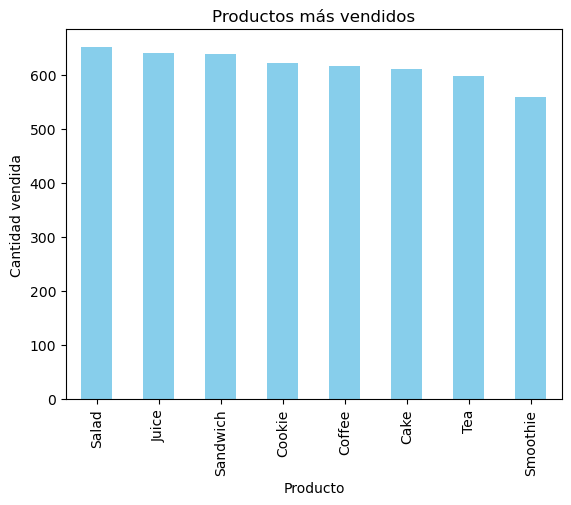

In [52]:
# Contar las ventas por producto
item_counts = data['Item'].value_counts()

# Graficar productos m√°s vendidos
item_counts.plot(kind='bar', title='Productos m√°s vendidos', color='skyblue')
plt.xlabel('Producto')
plt.ylabel('Cantidad vendida')
plt.savefig("imagenes/productos_mas_vendidos.png", dpi=300, bbox_inches="tight")
plt.show()

### ¬øCu√°l es la ubicaci√≥n m√°s rentable?


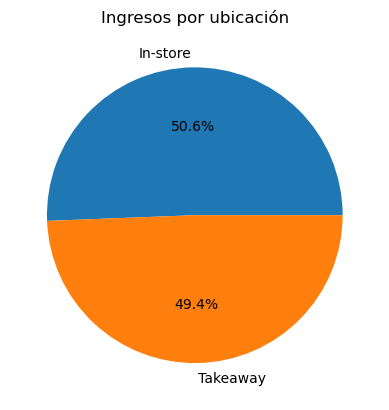

In [53]:

# Aseguro de que 'Total Spent' sea num√©rico 
data['Total Spent'] = pd.to_numeric(data['Total Spent'], errors='coerce')

# Eliminar filas con NaN si es necesario
data = data.dropna(subset=['Total Spent'])

# Sumar ingresos por ubicaci√≥n
location_revenue = data.groupby('Location')['Total Spent'].sum()

# Graficar ingresos por ubicaci√≥n
location_revenue.plot(kind='pie', autopct='%1.1f%%', title='Ingresos por ubicaci√≥n')
plt.ylabel('')
plt.savefig("imagenes/ingresos_por_ubicacion", dpi=300, bbox_inches="tight")
plt.show()



### ¬øQu√© m√©todos de pago son los m√°s utilizados?

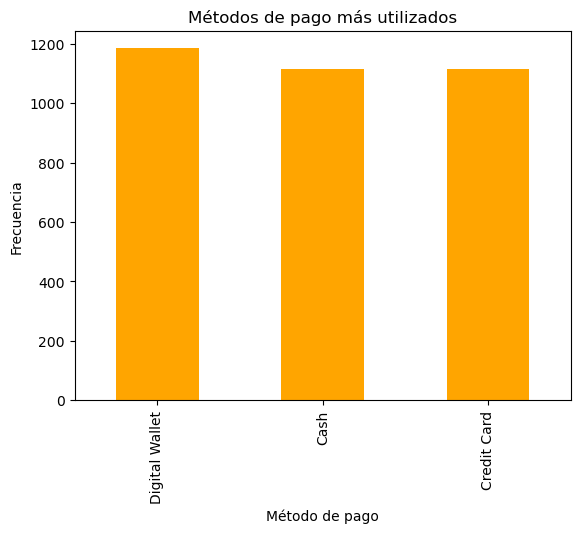

In [54]:
# Contar m√©todos de pago
payment_counts = data['Payment Method'].value_counts()

# Graficar m√©todos de pago
payment_counts.plot(kind='bar', title='M√©todos de pago m√°s utilizados', color='orange')
plt.xlabel('M√©todo de pago')
plt.ylabel('Frecuencia')
plt.savefig("imagenes/metodos_de_pago.png", dpi=300, bbox_inches="tight")
plt.show()


## Preguntas clave para el an√°lisis: Rentabilidad

#### ¬øCu√°les son los d√≠as m√°s rentables?

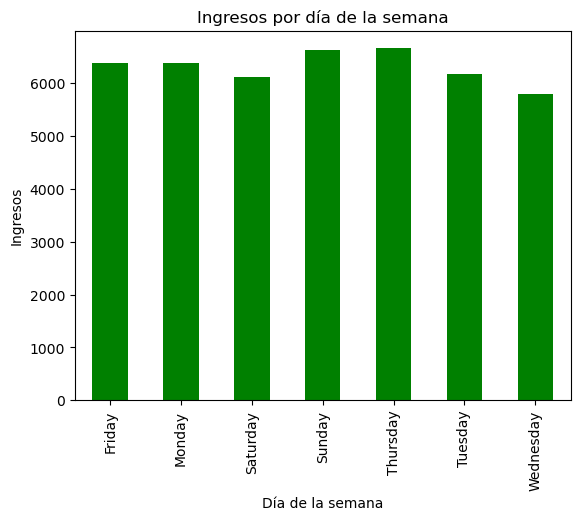

In [55]:
# Convertir columna "Transaction Date" a formato datetime
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])


# Extraer d√≠a de la semana
data['Day of Week'] = data['Transaction Date'].dt.day_name()

# Sumar ingresos por d√≠a
day_revenue = data.groupby('Day of Week')['Total Spent'].sum()

# Graficar ingresos por d√≠a
day_revenue.plot(kind='bar', title='Ingresos por d√≠a de la semana', color='green')
plt.xlabel('D√≠a de la semana')
plt.ylabel('Ingresos')
plt.savefig("imagenes/dias_mas_rentables.png", dpi=300, bbox_inches="tight")
plt.show()


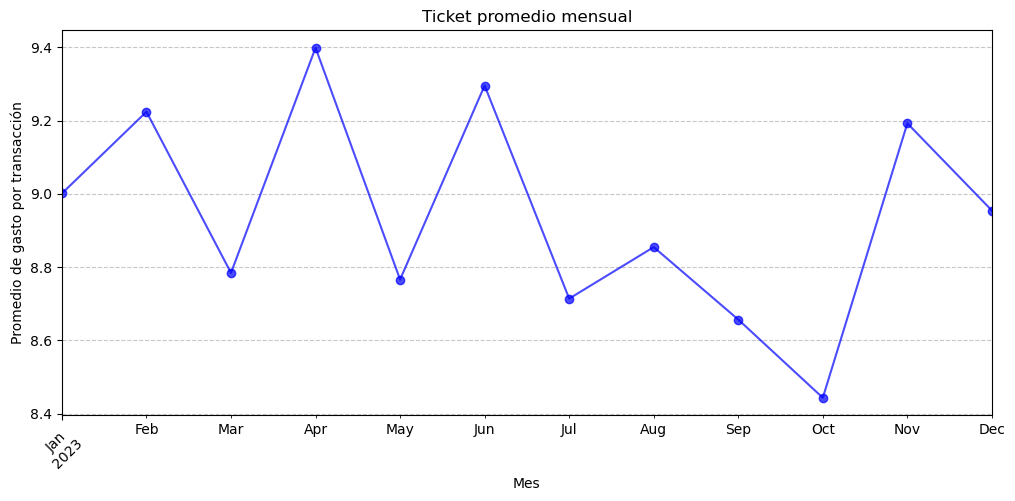

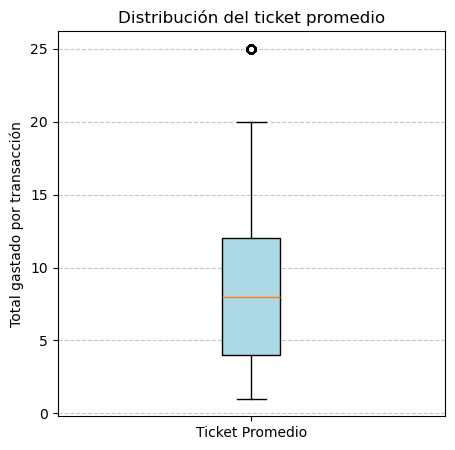

In [56]:
# Convertir 'Transaction Date' a datetime
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Calcular el ticket promedio por mes
avg_ticket_per_month = data.groupby(data['Transaction Date'].dt.to_period('M'))['Total Spent'].mean()

# Graficar el ticket promedio por mes
plt.figure(figsize=(12,5))
avg_ticket_per_month.plot(kind='line', marker='o', color='blue', alpha=0.7)
plt.title('Ticket promedio mensual')
plt.xlabel('Mes')
plt.ylabel('Promedio de gasto por transacci√≥n')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("imagenes/ticket_promedio_mensual.png", dpi=300, bbox_inches="tight")
plt.show()

# ticket promedio por cliente
ticket_per_client = data.groupby('Transaction ID')['Total Spent'].sum()

# Boxplot para visualizar la distribuci√≥n del ticket promedio
plt.figure(figsize=(5,5))
plt.boxplot(ticket_per_client, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribuci√≥n del ticket promedio')
plt.ylabel('Total gastado por transacci√≥n')
plt.xticks([1], ['Ticket Promedio'])  # Etiqueta personalizada para el eje X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("imagenes/distribucion_ticket_promedio.png", dpi=300, bbox_inches="tight")
plt.show()



### üìä Interpretaci√≥n del Boxplot del Ticket Promedio

1Ô∏è‚É£ **Mediana (l√≠nea naranja en el centro de la caja)**  
   - La mitad de las transacciones tienen un gasto menor a este valor y la otra mitad un gasto mayor.  
   - Parece estar cerca de **$7-$8**, lo que significa que el **ticket promedio m√°s com√∫n** est√° en ese rango.  

2Ô∏è‚É£ **Rango intercuartil (IQR - la caja azul)**  
   - **El 50% de las transacciones est√°n entre aproximadamente $3 y $12.**  
   - Esto indica que la mayor√≠a de los clientes gasta dentro de este rango en cada compra.  

3Ô∏è‚É£ **Bigotes (l√≠neas negras que se extienden desde la caja)**  
   - Representan el rango en el que caen la mayor√≠a de las transacciones.  
   - **El ticket promedio m√°s bajo est√° cerca de $1 y el m√°s alto cerca de $20.**  

4Ô∏è‚É£ **Outlier (punto negro arriba de los bigotes)**  
   - Es un gasto anormalmente alto, alrededor de **$25.**  
   - Esto puede indicar una compra grande o un cliente que compr√≥ muchos productos en una sola transacci√≥n.  

üí° **Conclusi√≥n**  
- La mayor√≠a de los clientes gasta entre **$3 y $12** en una compra.  
- Hay transacciones de **$1 a $20**, pero algunas pocas superan **$25**, lo que podr√≠a indicar pedidos grandes o especiales.  
- Si queremos aumentar el ticket promedio, podr√≠amos analizar qu√© productos compran los clientes con tickets m√°s altos.  



 ### üìä Pr√≥ximo An√°lisis: ¬øPor qu√© el ticket promedio es m√°s bajo en Septiembre y Octubre?

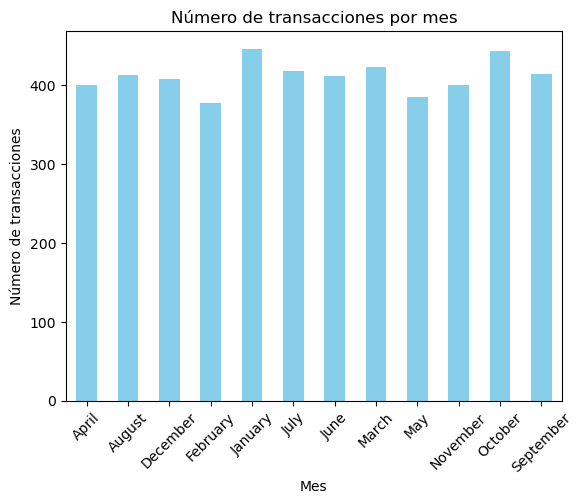

In [57]:
# Extraer el mes de la columna "Transaction Date"
data['Month'] = data['Transaction Date'].dt.month_name()

# Contar n√∫mero de transacciones por mes
transactions_per_month = data.groupby('Month')['Transaction ID'].nunique()

# Graficar
transactions_per_month.sort_index().plot(kind='bar', color='skyblue', title='N√∫mero de transacciones por mes')
plt.xlabel('Mes')
plt.ylabel('N√∫mero de transacciones')
plt.xticks(rotation=45)
plt.savefig("imagenes/transacciones_por_mes.png", dpi=300, bbox_inches="tight")
plt.show()


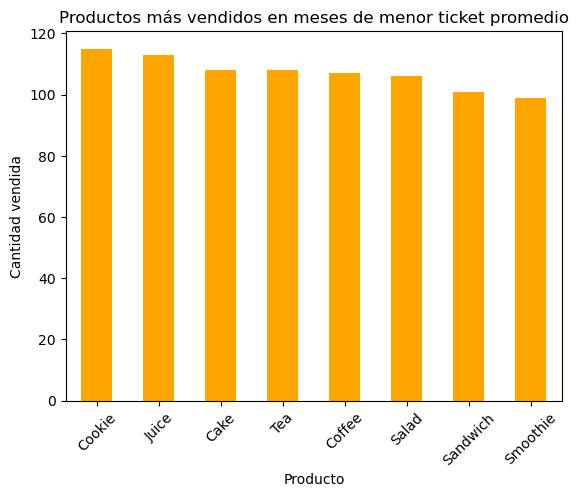

In [58]:
# Filtrar solo los meses de inter√©s
meses_bajos = ['September', 'October']
data_bajos = data[data['Month'].isin(meses_bajos)]

# Contar cu√°ntas veces se vendi√≥ cada producto
productos_mas_vendidos = data_bajos['Item'].value_counts()

# Graficar
productos_mas_vendidos.plot(kind='bar', color='orange', title='Productos m√°s vendidos en meses de menor ticket promedio')
plt.xlabel('Producto')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=45)
plt.savefig("imagenes/productos_mas_vendidos_peores_meses.png", dpi=300, bbox_inches="tight")
plt.show()




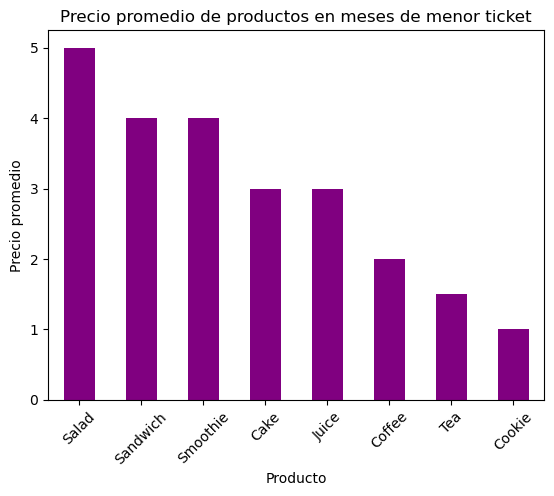

In [59]:

# Asegurar que 'Price Per Unit' es num√©rico, convirtiendo errores en NaN
data['Price Per Unit'] = pd.to_numeric(data['Price Per Unit'], errors='coerce')

# Filtrar los datos de meses con bajo ticket promedio
data_bajos = data[data['Transaction Date'].dt.month.isin([9, 10])]

# Calcular el precio promedio de cada producto en esos meses
precio_promedio_bajos = data_bajos.groupby('Item')['Price Per Unit'].mean().sort_values(ascending=False)

# Graficar
precio_promedio_bajos.plot(kind='bar', color='purple', title='Precio promedio de productos en meses de menor ticket')
plt.xlabel('Producto')
plt.ylabel('Precio promedio')
plt.xticks(rotation=45)
plt.savefig("imagenes/precio_promedio_productos_peores_meses", dpi=300, bbox_inches="tight")
plt.show()

## üìä An√°lisis de los Productos M√°s Vendidos y su Relaci√≥n con el Ticket Promedio  

### üîπ Observaciones  
- Durante los meses de septiembre y octubre, el **ticket promedio** fue el m√°s bajo del a√±o.  
- En estos meses, los productos **m√°s vendidos** fueron:  
  1. **Tea**  
  2. **Salad**  
  3. **Cookie**  
  4. **Sandwich**  
  5. **Coffee**  
  6. **Juice**  
  7. **Cake**  
  8. **Smoothie**  

### üîπ Relaci√≥n Precio - Ventas  
Al analizar el **precio promedio** de cada producto, encontramos que:  
‚úÖ **Salad es el producto con mayor precio** en estos meses.  
‚úÖ **Los productos m√°s vendidos (Tea, Cookie, Coffee, Juice) son los de menor precio**.  
‚úÖ **Esto confirma que el bajo ticket promedio en estos meses se debe a una mayor venta de productos econ√≥micos**.  

### üîπ Posibles Causas  
üìå **Cambio en el comportamiento del cliente**: Prefieren opciones m√°s econ√≥micas en estos meses.  
üìå **Se ofrecieron promociones o descuentos en productos de bajo precio**.  
üìå **Estacionalidad**: Factores externos pueden influir en el gasto promedio de los clientes.  

### üîπ Pr√≥ximo An√°lisis  
Para complementar este estudio, exploraremos:  
üîπ **Ingresos generados por cada categor√≠a de producto** ‚Üí ¬øLos productos m√°s vendidos generan m√°s ingresos?  
üîπ **Margen de contribuci√≥n** ‚Üí ¬øEs rentable vender m√°s de los productos baratos o deber√≠amos incentivar los m√°s costosos?  


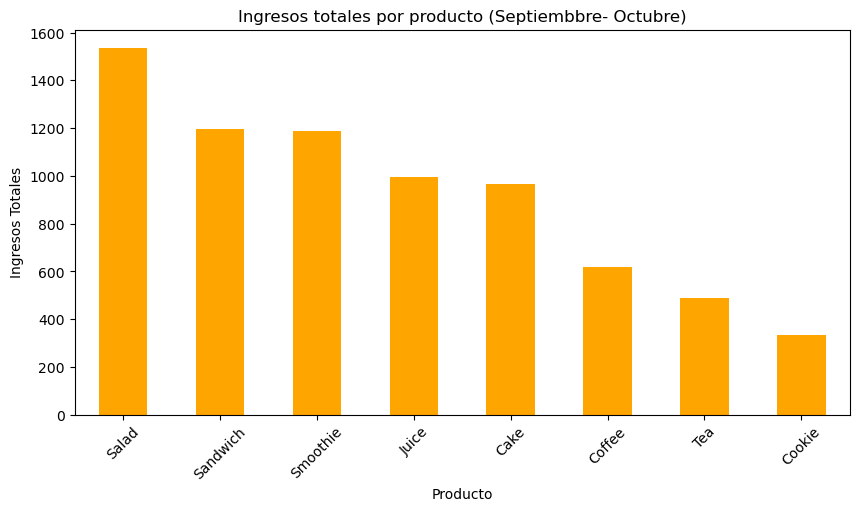

In [60]:
# Filtrar datos de los meses con bajo ticket promedio
data_bajos = data[data['Transaction Date'].dt.month.isin([9, 10])]

# Calcular ingresos totales por producto
ingresos_por_producto = data_bajos.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)

# Graficar los ingresos por producto
plt.figure(figsize=(10, 5))
ingresos_por_producto.plot(kind='bar', color='orange', title='Ingresos totales por producto (Septiembbre- Octubre)')
plt.xlabel('Producto')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.savefig("imagenes/ingresos_totales_peores_meses.png", dpi=300, bbox_inches="tight")
plt.show()


## üìä An√°lisis de Ingresos por Producto (Agosto - Octubre)  

### üîπ Observaciones  
- **Salad, Sandwich y Smoothie** son los productos que m√°s ingresos generan.  
- **Tea y Cookie**, aunque est√°n entre los m√°s vendidos, aportan los menores ingresos.  
- Esto confirma que el bajo ticket promedio en estos meses se debe a la venta masiva de productos de bajo costo.  

### üîπ Conclusi√≥n  
‚úÖ **Vender m√°s no siempre significa generar m√°s ingresos**.  
‚úÖ **El ticket promedio bajo se explica porque los clientes prefieren productos econ√≥micos en estos meses**.  
‚úÖ **Estrategia recomendada**: Incentivar la compra de productos de mayor valor para mejorar la rentabilidad.  

### üîπ Pr√≥ximo An√°lisis  
Para complementar este estudio, analizaremos:  
üîπ **Margen de contribuci√≥n por producto** ‚Üí ¬øQu√© tan rentable es vender cada uno de estos productos?  


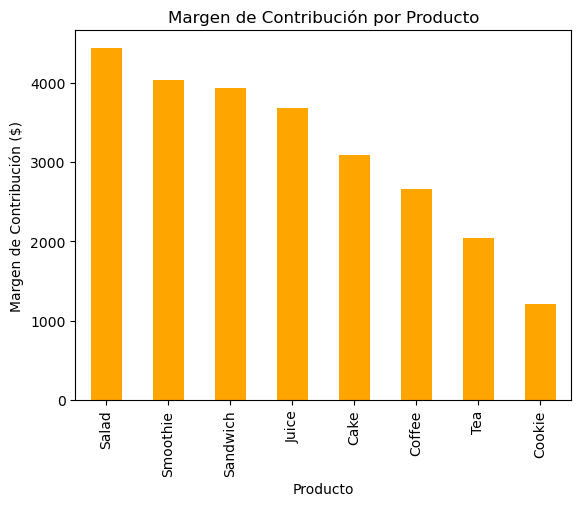

Ingresos Totales  Margen Contribuci√≥n
Item                                           
Salad               9860.0             4437.000
Smoothie            6716.0             4029.600
Sandwich            7864.0             3932.000
Juice               5661.0             3679.650
Cake                5610.0             3085.500
Coffee              3794.0             2655.800
Tea                 2731.5             2048.625
Cookie              1863.0             1210.950

In [61]:
# Definir los m√°rgenes estimados por categor√≠a
margenes = {
    'Coffee': 0.70,
    'Tea': 0.75,
    'Smoothie': 0.60,
    'Juice': 0.65,
    'Cake': 0.55,
    'Sandwich': 0.50,
    'Salad': 0.45,
    'Cookie': 0.65
}

# Crear una nueva columna con el margen de contribuci√≥n
data['Margen Contribucion'] = data.apply(lambda row: row['Total Spent'] * margenes.get(row['Item'], 0), axis=1)

# Agrupar por producto y sumar el margen total
ingreso_por_producto = data.groupby('Item')['Total Spent'].sum()
margen_por_producto = data.groupby('Item')['Margen Contribucion'].sum()

# Crear DataFrame con resultados
margen_df = pd.DataFrame({'Ingresos Totales': ingreso_por_producto, 'Margen Contribuci√≥n': margen_por_producto})
margen_df.sort_values(by='Margen Contribuci√≥n', ascending=False, inplace=True)

# Graficar el margen de contribuci√≥n por producto
margen_df['Margen Contribuci√≥n'].plot(kind='bar', color='orange', title='Margen de Contribuci√≥n por Producto')
plt.xlabel('Producto')
plt.ylabel('Margen de Contribuci√≥n ($)')
plt.savefig("imagenes/MC_por_producto.png", dpi=300, bbox_inches="tight")
plt.show()

# Mostrar resultados
margen_df


## ü•ó An√°lisis del Margen de Contribuci√≥n por Producto  

### üîç **Interpretaci√≥n de los resultados**  
El an√°lisis del margen de contribuci√≥n revela que algunos productos, aunque no sean los m√°s vendidos en unidades, generan la mayor rentabilidad para el negocio.  

### üìä **Productos con mayor margen de contribuci√≥n**  
- **Salad** ü•ó ($4,437.00) ‚Üí Producto m√°s rentable, con un precio de venta elevado y un costo de producci√≥n relativamente bajo.  
- **Smoothie** ü•§ ($4,029.60) y **Sandwich** ü•™ ($3,932.00) ‚Üí Tambi√©n tienen altos m√°rgenes, lo que indica que son productos clave para la rentabilidad.  

### üìâ **Productos con menor margen de contribuci√≥n**  
- **Cookie** üç™($1,210.95) ‚Üí Menor margen, posiblemente debido a su bajo precio de venta.  
- **Tea** üçµ ($2,048.63) y **Coffee** ‚òï ($2,655.80) ‚Üí Aunque se venden en volumen, no generan tanto margen como otros productos.  

### ü§î **¬øPor qu√© Salad es el m√°s rentable?**  
A pesar de que los vegetales son ingredientes econ√≥micos, hay varios factores que explican su alto margen:  
‚úÖ **Precio de venta alto** Percepci√≥n de producto saludable y premium.  
‚úÖ **Bajo costo de ingredientes**  No requiere insumos costosos como pan, prote√≠nas procesadas o l√°cteos.  
‚úÖ **Menos desperdicio**  A diferencia de panader√≠a o jugos, los ingredientes pueden aprovecharse mejor sin tanto desperdicio.  

### üöÄ **Conclusi√≥n y posibles estrategias**  
1Ô∏è‚É£ **Impulsar la venta de Salad, Smoothie y Sandwich** con promociones o combos.  
2Ô∏è‚É£ **Evaluar opciones para mejorar el margen de Coffee, Tea y Cookie**, como ajustes de precio o estrategias de upselling.  
3Ô∏è‚É£ **Explorar si Salad se vende m√°s en ciertos d√≠as o clientes espec√≠ficos** para personalizar promociones.  
